# Osteoarthritis-Analysis with Deep Learning
## Transfer-Learning
Nikolas Wilhelm

<table><tr>
<td> <img src="./img/fastai.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="./img/pytorch.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

fastai:
https://www.fast.ai/

Pytorch:
https://pytorch.org/

Knee Osteoarthritis Severity Grading Dataset:
http://dx.doi.org/10.17632/56rmx5bjcr.1

## Import relevant packages

to install: `conda install -c fastai -c pytorch -c anaconda fastai gh anaconda`

In [29]:
from fastai.vision.all import * # The complete Fastai vision library
from fastai.metrics import accuracy # For Determining the accuracy
import fastai

fastai.__version__

'2.2.5'

# 1. Get the Dataset

Therefore we first have to download and extract the dataset: (size 6.7GB)

http://dx.doi.org/10.17632/56rmx5bjcr.1

In [30]:
# ToDo: Edit your personal path here!
my_path = 'C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224'


<table><tr>
<td> <img src="./img/folder_structure.png" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>


Further we need the docu open in order to look up handy functions:
https://docs.fast.ai/

# 2. Get the Dataset into a DataBlock
A DataBlock is a structure which knows how to:
* get the items                                -> get_items  = ?
* get the labels                               -> get_y      = ?
* divides between training and validation data -> splitter   = ?
* fites all items on the same scale            -> item_tfms  = ?
* applies augmentation during training         -> batch_tfms = ?

```python
# The general structure we want to fit all our data in:
dblock = DataBlock(blocks     = (ImageBlock, CategoryBlock),
                   get_items  = ???,
                   get_y      = ???,
                   splitter   = ???,
                   item_tfms  = ???,
                   batch_tfms = ???,
                  )
# Create the dataloader from the DataBlock
dls = dblock.dataloaders(path=my_path)
```

## 2.1 How do we get the items?
fastai provides us with a function for that: 
```python 
get_image_files(path:str)
```

In [31]:
# simply get a list of all filenames, which are images within this repository:
fnames = get_image_files(my_path)
fnames

(#9786) [Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9003175_1.png'),Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9003175_2.png'),Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9003316_2.png'),Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9003815_1.png'),Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9003815_2.png'),Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9004184_1.png'),Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9006407_2.png'),Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9009927_2.png'),Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9009957_2.png'),Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9010308_1.png')...]

## 2.2 How do we get a label from this list of items?
```Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9003175_1.png')```

We have to define a function, which assigns a label to each image
-> The name of the label is already contained within the path string!

In [33]:
def my_label_func(filename):
    """simply get the name of the parent directory"""
    return Path(filename).parent.name

In [34]:
# immedeately test:
my_label_func(fnames[0])

'0'

## 2.3 Next step is to split the data into training and validation data
```Path('C:/Users/Niko/Documents/data/KneeXrayData/ClsKLData/kneeKL224/auto_test/0/9003175_1.png')```

https://docs.fast.ai/data.transforms.html#GrandparentSplitter

In [36]:
#?? GrandparentSplitter

In [37]:
my_dataset_splitter = GrandparentSplitter(train_name='train', valid_name='val')

## 2.4 Will all our images have the same size? If not we can resize all data in order to be uniform

In [8]:
my_item_tfms = Resize(size=224)

In [9]:
# ?? Resize

## 2.5 Finally we want to apply proper data augmentation
fastai provides us with the very handy function:
```python
aug_transforms(size=???)
````

- Mirror horizontally (left/right knee)

<img src="./img/flip.jpg" width = 50>

- rotate for +/- 10 degree

<img src="./img/rotate.png" width = 50>

- scale for 0.9 to 1.1

<img src="./img/scale.png" width = 50>

In [40]:
my_aug_transforms = aug_transforms(size=224)

In [39]:
#?? aug_transforms

## Now let's get everything together:

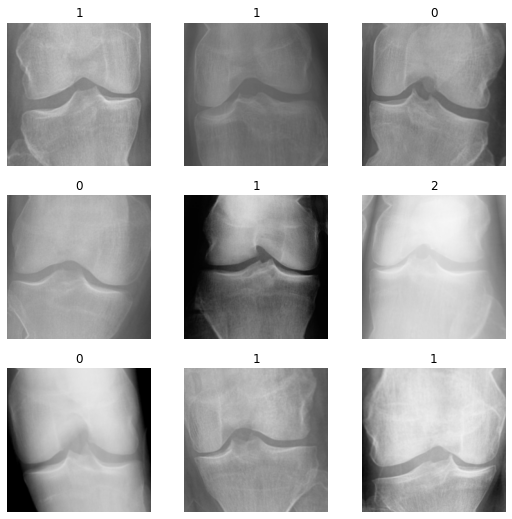

In [43]:
# Define the DataBlock
dblock = DataBlock(blocks     = (ImageBlock, CategoryBlock),
                   get_items  = get_image_files,     # 2.1
                   get_y      = my_label_func,       # 2.2
                   splitter   = my_dataset_splitter, # 2.3
                   item_tfms  = my_item_tfms,        # 2.4
                   batch_tfms = my_aug_transforms,   # 2.5
                  )

# Define the dataloader
dls = dblock.dataloaders(my_path,       # define the source
                         bs=64,         # adjust if network is too large
                         num_workers=0, # only for windows -> slow
                        )

# Don't forget to always look at your result to verify!
dls.show_batch()

In [13]:
#?? dblock.dataloaders

# 3. Let's get our neural Network!:

### For image data: Convolutional Neural Network!

<img src="./img/conv_nn.jpeg">

In [44]:
learn = cnn_learner(dls, models.resnet50, metrics=accuracy)

In [15]:
#?? cnn_learner

## Was enthält dieser "Learner" alles??

In [45]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [48]:
# learn.summary()

<img src="./img/resnet34.png">

# 4. Training!!

### -> We apply transfer learning, so our network is already trained on a different dataset and will now specialise on the new one.

In [18]:
# ?? learn.fit_one_cycle

In [18]:
learn.fit_one_cycle(4) # train for 4 cycles
learn.save('./trial1') # save the result

epoch,train_loss,valid_loss,accuracy,time
0,2.410862,1.738013,0.411622,01:01
1,1.815969,1.330759,0.485472,01:02
2,1.476761,1.205294,0.548426,01:03
3,1.369580,1.188584,0.549637,01:05


Path('models/trial1.pth')

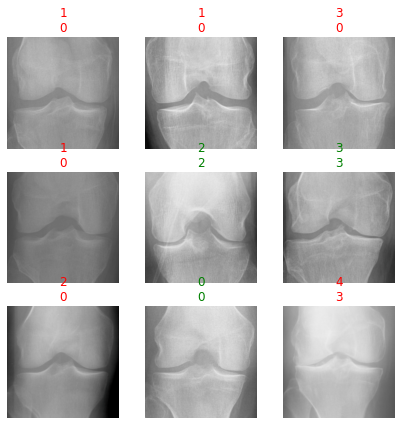

In [49]:
learn = learn.load('./trial1')
learn.show_results(figsize=(7,7))

In [50]:
interp = ClassificationInterpretation.from_learner(learn)

## Show confusion matrix and classification report

              precision    recall  f1-score   support

           0       0.54      0.91      0.68       328
           1       0.19      0.02      0.04       153
           2       0.56      0.44      0.49       212
           3       0.61      0.51      0.56       106
           4       0.67      0.22      0.33        27

    accuracy                           0.55       826
   macro avg       0.51      0.42      0.42       826
weighted avg       0.50      0.55      0.49       826



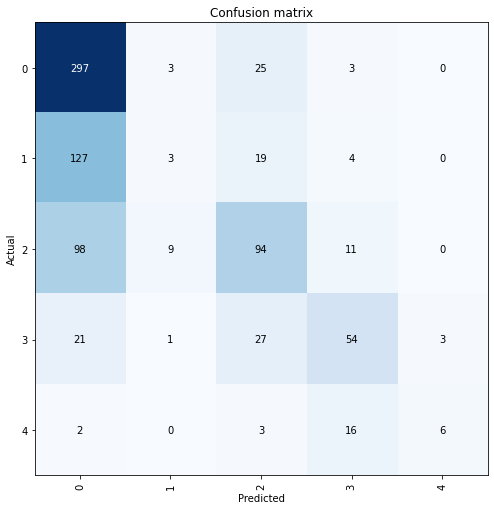

In [51]:
interp.plot_confusion_matrix(figsize=(7,7))
interp.print_classification_report()

# 5. Can we improve ??

SuggestedLRs(lr_min=8.31763736641733e-07, lr_steep=4.786300905834651e-06)

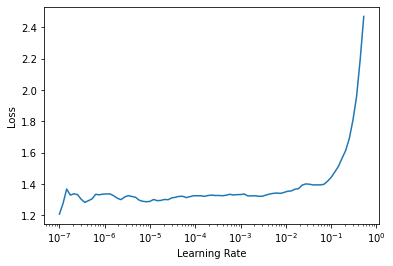

In [22]:
learn.lr_find()

In [23]:
learn.fine_tune(40, 1e-4)
learn.save('./trial2')

epoch,train_loss,valid_loss,accuracy,time
0,1.301570,1.165954,0.559322,01:00


epoch,train_loss,valid_loss,accuracy,time
0,1.260745,1.170382,0.550847,01:22
1,1.261636,1.159449,0.556901,01:22
2,1.255572,1.148258,0.560533,01:20
3,1.252275,1.153543,0.560533,01:21
4,1.239665,1.145174,0.566586,01:20
5,1.219749,1.130947,0.567797,01:22
6,1.210761,1.128694,0.573850,01:22
7,1.172373,1.114257,0.575061,01:22
8,1.142537,1.105415,0.573850,01:22
9,1.112119,1.067582,0.584746,01:22


Path('models/trial2.pth')

In [26]:
learn.load('./trial2');

              precision    recall  f1-score   support

           0       0.61      0.89      0.73       328
           1       0.36      0.11      0.17       153
           2       0.60      0.50      0.55       212
           3       0.76      0.69      0.72       106
           4       0.77      0.89      0.83        27

    accuracy                           0.62       826
   macro avg       0.62      0.62      0.60       826
weighted avg       0.59      0.62      0.58       826



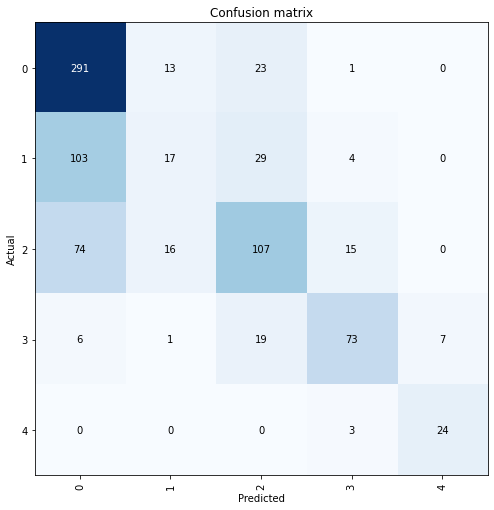

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(7,7))
interp.print_classification_report()

Comparison to publications:
<table><tr>
<td> <img src="./img/paper_result.png" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>

# Now it's your turn to improve!!

### Possible improvements:
* vary augmentation
* larger network
* Mixed Precision
* MixUp
* Multi Stage Training
* Larger Batch Size
* ...

# Thank you for your attention!

Please visit https://www.fast.ai/ and check out their excellent work and other tutorials!